# Random Variable

In [1]:
import matplotlib.pyplot as plt
from IPython.display import Math, Latex
from IPython.core.display import Image

In [2]:
import seaborn as sns
sns.set(color_codes=True)
sns.set(rc={'figure.figsize' : (5,5)})

### Uniform Distribution

In [4]:
from scipy.stats import uniform

n = 10000
start = 10
width = 20
data_uniform = uniform.rvs(size=n, loc=start, scale=width)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Uniform Distribution'), Text(0, 0.5, 'Frequency')]

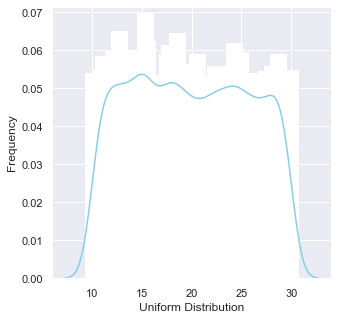

In [5]:
ax = sns.distplot(data_uniform, bins=100,kde=True,
                 color='skyblue', hist_kws={'linewidth':15, 
                                           'alpha':1})

ax.set(xlabel='Uniform Distribution', ylabel='Frequency')

### Normal Distribution

In [9]:
from scipy.stats import norm

data_normal = norm.rvs(size=10000, loc=0, scale=1)

[Text(0.5, 0, 'Normal Distribution'), Text(0, 0.5, 'Frequency')]

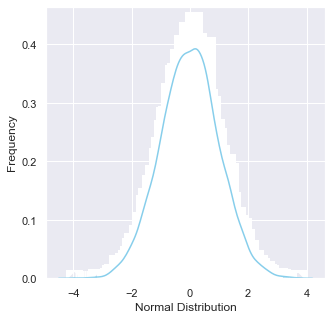

In [10]:
ax = sns.distplot(data_normal, bins=100,kde=True,
                 color='skyblue', hist_kws={'linewidth':15, 
                                           'alpha':1})

ax.set(xlabel='Normal Distribution', ylabel='Frequency')

### Gamma Distribution

In [11]:
from scipy.stats import gamma

data_gamma = gamma.rvs(a=5, size=10000)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Gamma Distribution'), Text(0, 0.5, 'Frequency')]

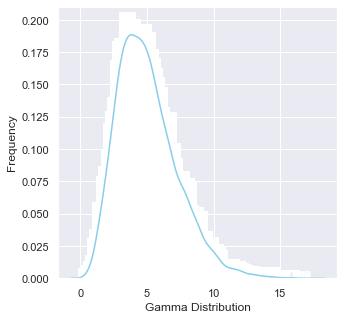

In [12]:
ax = sns.distplot(data_gamma, bins=100,kde=True,
                 color='skyblue', hist_kws={'linewidth':15, 
                                           'alpha':1})

ax.set(xlabel='Gamma Distribution', ylabel='Frequency')

### Exponential Distribution

In [14]:
from scipy.stats import expon

data_expon = expon.rvs(scale=1, loc=1, size=1000)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Exponential Distribution'), Text(0, 0.5, 'Frequency')]

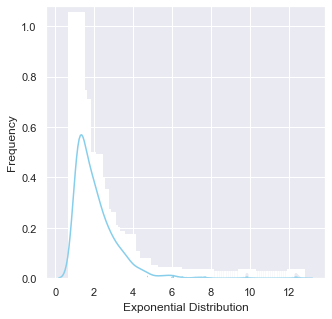

In [15]:
ax = sns.distplot(data_expon, bins=100,kde=True,
                 color='skyblue', hist_kws={'linewidth':15, 
                                           'alpha':1})

ax.set(xlabel='Exponential Distribution', ylabel='Frequency')

### Poisson Distribution

In [16]:
from scipy.stats import poisson

data_poisson = poisson.rvs(mu=3, size=10000)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Poisson Distribution'), Text(0, 0.5, 'Frequency')]

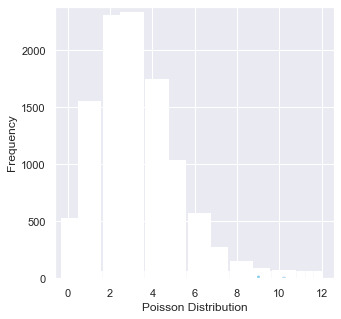

In [17]:
ax = sns.distplot(data_poisson, bins=30,kde=False,
                 color='skyblue', hist_kws={'linewidth':15, 
                                           'alpha':1})

ax.set(xlabel='Poisson Distribution', ylabel='Frequency')

### Binomial Distribution

In [18]:
from scipy.stats import binom

data_binom = binom.rvs(n=10, p=0.8, size=10000)

[Text(0.5, 0, 'Binomial Distribution'), Text(0, 0.5, 'Frequency')]

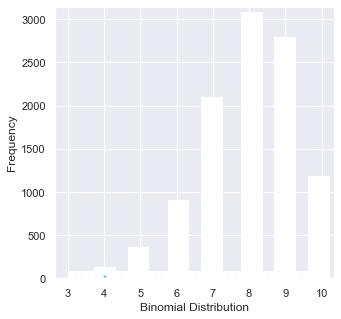

In [19]:
ax = sns.distplot(data_binom, kde=False,
                 color='skyblue', hist_kws={'linewidth':15, 
                                           'alpha':1})

ax.set(xlabel='Binomial Distribution', ylabel='Frequency')

### Bernoulli Distribution

In [20]:
from scipy.stats import bernoulli

data_bern = bernoulli.rvs(size=10000, p=0.6)

[Text(0.5, 0, 'Bernoulli Distribution'), Text(0, 0.5, 'Frequency')]

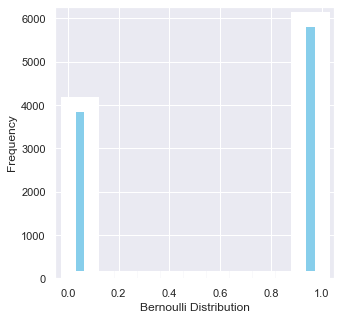

In [21]:
ax = sns.distplot(data_bern,kde=False,
                 color='skyblue', hist_kws={'linewidth':15, 
                                           'alpha':1})

ax.set(xlabel='Bernoulli Distribution', ylabel='Frequency')

# Confidence Intervals

In [27]:
import pandas as pd
import numpy as np

df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [28]:
df['sex1'] = df.sex.replace({1:'Male', 0:'female'})

In [29]:
dx = df[['target', 'sex1']].dropna()

In [30]:
pd.crosstab(dx.target, dx.sex1)

sex1,Male,female
target,,
0,413,86
1,300,226


In [32]:
# proporsi wanita yang menderita penyakit jantung
p_fm = 226 / (86+226)
p_fm

0.7243589743589743

In [33]:
n = 86+226

In [34]:
# standard error
se_female = np.sqrt(p_fm * (1 - p_fm) / n)
se_female

0.02529714756803247

In [36]:
z_score = 1.96
lcb = p_fm - z_score* se_female
ucb = p_fm + z_score* se_female

# confidence Interval
lcb, ucb

(0.6747765651256307, 0.773941383592318)

#### Other example of Confidence Intervals

In [37]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import numpy as np
import random
import warnings
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(13,7.5)})
sns.set_context('talk')

In [41]:
np.random.seed(42)
normal_distribution_us_male_mass_pounds = np.random.normal(loc=181, scale=24, size=6000)
normal_distribution_us_female_mass_pounds = np.random.normal(loc=132,scale=22, size=6000)
all_mass_values = np.concatenate((normal_distribution_us_male_mass_pounds,
                                 normal_distribution_us_female_mass_pounds),
                                axis=0)
df_ppl_mass = pd.DataFrame(data={'us_people_mass_pounds': all_mass_values})

df_ppl_mass.head()

,us_people_mass_pounds
0,192.921140
1,177.681657
2,196.544525
3,217.552717
4,175.380319


Text(0.5, 1.015, 'Distribution of Mass of People in U.S')

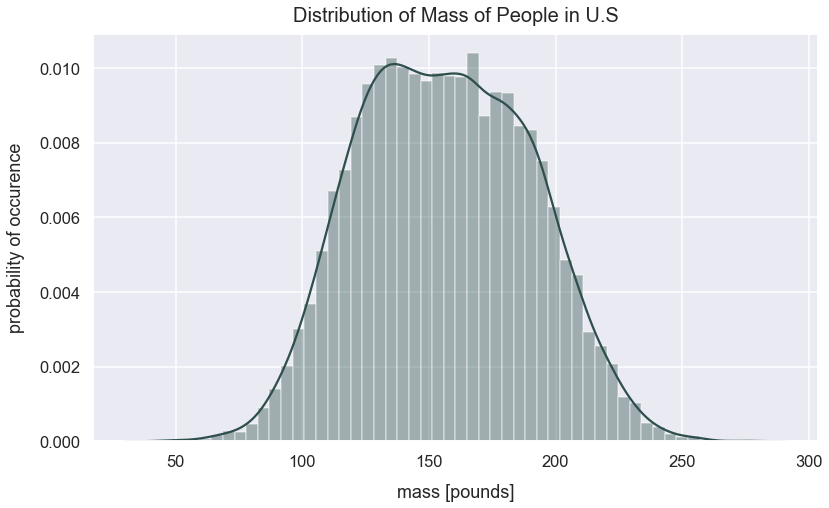

In [43]:
sns.distplot(df_ppl_mass['us_people_mass_pounds'], color='darkslategrey')
plt.xlabel('mass [pounds]', labelpad=14)
plt.ylabel('probability of occurence', labelpad=14)
plt.title('Distribution of Mass of People in U.S', y=1.015, fontsize=20)

In [44]:
pop_mean_mass = df_ppl_mass['us_people_mass_pounds'].mean()
pop_mean_mass

156.36403121225456

In [45]:
pop_std_mass = df_ppl_mass['us_people_mass_pounds'].std()
pop_std_mass

33.68618705978196

In [46]:
standard_error = pop_std_mass / np.sqrt(n)
standard_error

1.9071047987844985

# Hypothesis Testing

In [47]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [48]:
da = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/nhanes_2015_2016.csv')
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [49]:
females = da[da['RIAGENDR'] == 2]
males = da[da['RIAGENDR'] == 1]

In [50]:
n1 = len(females)
mu1 = females['BMXBMI'].mean()
sd1 = females['BMXBMI'].std()

(n1, mu1, sd1)

(2976, 29.939945652173996, 7.75331880954568)

In [51]:
n2 = len(males)
mu2 = males['BMXBMI'].mean()
sd2 = males['BMXBMI'].std()

(n2, mu2, sd2)

(2759, 28.778072111846985, 6.252567616801485)

In [53]:
sm.stats.ztest(females['BMXBMI'].dropna(),
              males['BMXBMI'].dropna(), alternative='two-sided')

(6.1755933531383205, 6.591544431126401e-10)

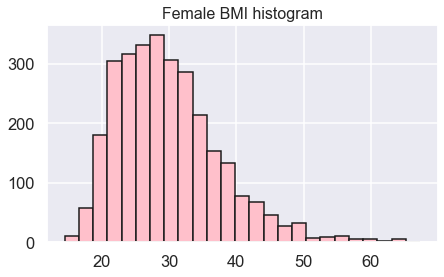

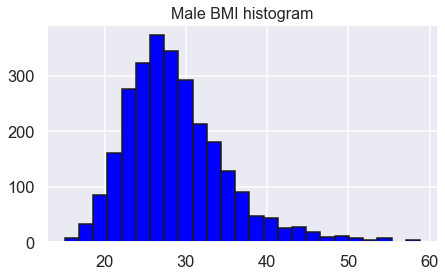

In [54]:
plt.figure(figsize=(7,4))
plt.title('Female BMI histogram', fontsize=16)
plt.hist(females['BMXBMI'].dropna(), edgecolor='k', color='pink', bins=25)

plt.show()

plt.figure(figsize=(7,4))
plt.title('Male BMI histogram', fontsize=16)
plt.hist(males['BMXBMI'].dropna(), edgecolor='k', color='blue', bins=25)

plt.show()

## Hypothesis Testing for One Proportion

In [55]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats.distributions as dist

df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [56]:
p_us = len(df[df['target'] == '1']) / len(df)
se = np.sqrt(0.42 * (1-0.42) / len(df))

# best estimate
be = p_us

# hypothesixed estimate
he = 0.42

test_stat = (be - he)/se

In [58]:
pvalue = 2*dist.norm.cdf(-np.abs(test_stat))
pvalue

1.9517162972676465e-163

## Shapiro-Wilk Test

In [60]:
from scipy.stats import shapiro

data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478,
       -1.637, -1.869]
stat, p = shapiro(data)
print('stat = %.3f, p=%.3f' %(stat,p))
if p > 0.05:
    print('Probability Gaussian')
else:
    print('Probaility not Gaussian')

stat = 0.895, p=0.193
Probability Gaussian


## D'Agostino's K^2 Test

In [61]:
from scipy.stats import normaltest

data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478,
       -1.637, -1.869]
stat, p = normaltest(data)
print('stat = %.3f, p=%.3f' %(stat,p))
if p > 0.05:
    print('Probability Gaussian')
else:
    print('Probaility not Gaussian')

stat = 3.392, p=0.183
Probability Gaussian


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


# Correlation Test

## Pearson's Correlation Coefficient

In [63]:
from scipy.stats import pearsonr
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478,
       -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.1578,
        -3.537, -1.579]

stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' %(stat,p))

if p > 0.05:
    print('Probability Independent')
else:
    print('Probaility Dependent')

stat=0.678, p=0.031
Probaility Dependent


## Spearman's Rank Correlation

In [64]:
from scipy.stats import spearmanr
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478,
       -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.1578,
        -3.537, -1.579]

stat, p = spearmanr(data1, data2)
print('stat=%.3f, p=%.3f' %(stat,p))

if p > 0.05:
    print('Probability Independent')
else:
    print('Probaility Dependent')

stat=0.842, p=0.002
Probaility Dependent


## Chi-Squared Test

In [66]:
from scipy.stats import chi2_contingency

table = [[10,20,30], [6,9,17]]
stat, p ,dof, expected = chi2_contingency(table)

print('stat=%.3f, p=%.3f' %(stat,p))

if p > 0.05:
    print('Probability Independent')
else:
    print('Probaility Dependent')

stat=0.272, p=0.873
Probability Independent


# Stationary Test

### Augmented Dickey-Fuller Unit Root Test

In [68]:
from statsmodels.tsa.stattools import adfuller

data = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
stat, p, lags, obs, crit, t = adfuller(data)
print('stat=%.3f, p=%.3f' %(stat,p))

if p > 0.05:
    print('Probability not Stationary')
else:
    print('Probaility Stationary')

stat=0.992, p=0.994
Probability not Stationary


### Kwiatkowski-Phillips-Schmidt-Shin

In [69]:
from statsmodels.tsa.stattools import kpss

data = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
stat, p, lags, crit = kpss(data)
print('stat=%.3f, p=%.3f' %(stat,p))

if p > 0.05:
    print('Probability not Stationary')
else:
    print('Probaility Stationary')

stat=0.410, p=0.073
Probability not Stationary


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
